<h1>Srinjoy Som</h1> <br>
BTech MnC 2026 <br>
IIT Guwahati <br>


<b><i>Monte Carlo Methods in Mathematical Finance</i></b>

In [2]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
    

In [18]:
def brownian_motion(N , T , mu , sig):
    arr = np.zeros(N+1) 
    arr[0] = 0 ; 
    t = T/N ; 
    for i in range(1 , N+1):
        arr[i] = arr[i-1] + mu*t + np.random.normal()*np.sqrt(t)*sig
    return arr 

In [19]:
A = brownian_motion(10000 , 1 , 0 , 1)
B = np.zeros(10001)
for i in range(10001):
    B[i] = i;

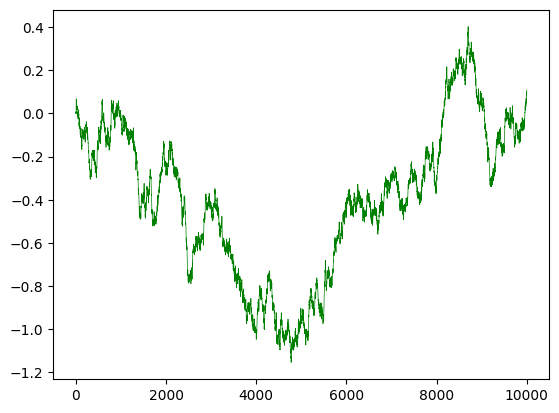

In [20]:
plt.plot(B , A , linewidth = 0.5 , color = 'green')

For mu and sigma fucntion of time we have to use integral of mu and sigma wrt variable t for the interval or euler backward or forward approaximation 

In [27]:
def cholesky_factorization(A): #For 2*2 matrix 
    """
    A = B*B' B is a lower triamgular matrix
    """
    B = np.zeros((2 , 2))
    B[0][0] = np.sqrt(A[0][0])
    B[1][0] = A[1][0]/B[0][0]
    B[1][1] = np.sqrt(A[1][1] - B[1][0]**2)
    return B ; 


In [35]:
def stock_price_simulation_by_Bond_price_data(N , sig , B , S0 , T ):
    '''
    B[i] = B(0 , ti) Bond price at time 0 for maturity at time ti
    Mind it we are not using the stock rate any where 
    '''
    S = np.zeros(N+1)
    S[0] =S0 ; 
    t = T/N ;
    for i in range(1 , N+1):
        S[i] = S[i-1] * B[i-1]/B[i] * np.exp(-0.5 * (sig*sig)*t + sig*np.sqrt(t)*np.random.normal())
    return S

In [25]:
def deterministic_volatility_function(C_K_T  , r , K , S):
    '''
    C_K_T is the value of call option at strike K and time to maturity T 
    S is the current stock price and r is the short rate 
    '''
    

In [26]:
def jump_diffusion_model(N , T , S0 , mu , sig , lam , Y): 
    """ 
    Y is the jump size here it is a deterministic value /   It can be a deterministic function as well as a stochastic quantity 
    lam is the Poisson process parameter
    mu sigma N T SO caryy there standard meaning  yo 
    """
    S = np.zeros(N+1)
    S[0] = S0 
    t = T/N
    for i in range(1 , N+1):
        J = np.random.poisson(lam*t)
        P = Y**J - 1
        S[i] = S[i-1] * np.exp( (mu - 0.5*sig*sig)*t + sig*np.sqrt(t)*np.random.normal() ) * (1 + P)
    return S

In [34]:
# Low Discrepancy Point Sequences
def van_der_corput(n , base):
    """ 
   Obvious what the params mean 
    """
    seq = np.zeros(n)
    for i in range(n):
        k = i 
        f = 1 
        r = 0 
        while k > 0:
            f = f / base 
            r = r + f * (k % base)
            k = k // base 
        seq[i] = r 
    return seq

In [29]:
VDC = van_der_corput(1000 , 2)

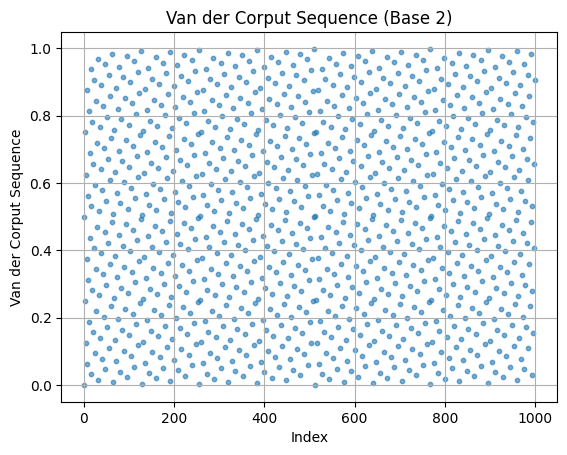

In [33]:
plt.scatter(range(len(VDC)), VDC, s=10, alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Van der Corput Sequence')
plt.title('Van der Corput Sequence (Base 2)')
plt.grid(True)
plt.show()

In [36]:
def Halton_sequence(base1 , base2 , n):
    seq1 = van_der_corput(n , base1)
    seq2 = van_der_corput(n , base2)
    halton_seq = np.zeros((2 , n))
    for i in range(n):
        halton_seq[0][i] = seq1[i]
        halton_seq[1][i] = seq2[i]
    return halton_seq


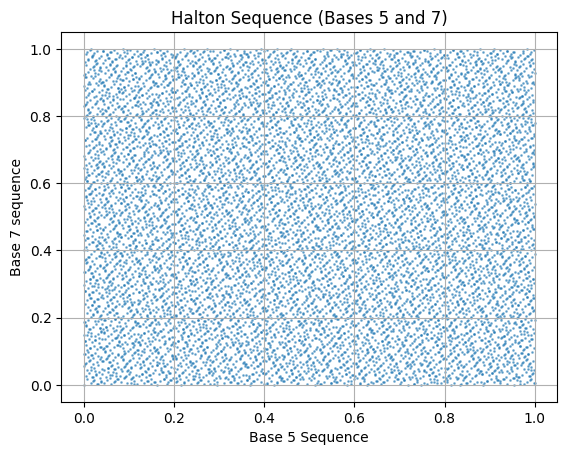

In [44]:
Pair = Halton_sequence( 5 , 7 , 10000)
plt.scatter(Pair[0] , Pair[1]  , s=1, alpha=0.5)
plt.xlabel('Base 5 Sequence')
plt.ylabel('Base 7 sequence')
plt.title('Halton Sequence (Bases 5 and 7)')
plt.grid(True)
plt.show()

In [ ]:
#Monte Carlo Option Valuation 
def call_option(sig , T , r , S0):
    ''' M is number of samples we are using increase M for better eastimation '''
    M = 10000 ; 
    V = np.zeros(M) 
    for i in range(M):
        V[i] = np.exp(-r*T) * max(0 , S0*np.exp((r - 0.5*sig**2)*T + sig*np.sqrt(T)*np.random.normal()))
    am = np.mean(V)
    var = np.var(V)
    bm = M*var/(M-1) # Logic behind this thing is that we want to take M-1 as the denominator 
    return (am , bm )

In [ ]:
#Exotic option Eg Up and Out option 
def UpAndOutOption(r , S0 , T , sig , U , K):
    ''' M is number of sample paths generated
        N is number of timestamps in each path
        M*N should be large enough for better estimation
        small enough for computational feasibility  
        U is the up and out barrier level
        K is the strike price'''
    M = 1000 
    N = 1000 
    V = np.zeros(M)
    for j in range(M):
        S = S0
        t = T/N
        for i in range(1 , N+1):
            S = S * np.exp( (r - 0.5*sig*sig)*t + sig*np.sqrt(t)*np.random.normal() )
            if(S >= U):
                V[j] = 0 
                break 
        if(S < U):
            V[j] = np.exp(-r*T) * max(0 , S - K)
    am = np.mean(V)
    bm = M*np.var(V)/(M-1)# Logic behind this thing is that we want to take M-1 as the denominator 
    return (am , bm )

In [ ]:
#Control Variates
def call_option_control_variate(sig , T , r , S0 , K):
    """ 
    We choose the control variate to be the stock price at time T 
    """
    M = 10000 
    V = np.zeros(M) 
    C = np.zeros(M) 
    for i in range(M):
        Z = np.random.normal()
        V[i] = np.exp(-r*T) * max(0 , S0*np.exp((r - 0.5*sig**2)*T + sig*np.sqrt(T)*Z - K ))
        C[i] = np.exp(-r*T) * S0 * np.exp((r - 0.5*sig**2)*T + sig*np.sqrt(T)*Z) 
    cov_VC = np.cov(V , C)[0][1]
    var_C = np.var(C)
    b_star = - cov_VC / var_C
    am_C = np.mean(C)
    adjusted_V = V + b_star * (C - am_C)
    am = np.mean(adjusted_V)
    var = np.var(adjusted_V)
    bm = M*var/(M-1) # Logic behind this thing is that we want to take M-1 as the denominator 
    return (am , bm )

In [50]:
#Antithetic Variables
def UpAndOutOptionAntithetic(r , T , S0 , sig , K , U):
    ''' M is number of sample paths generated
        N is number of timestamps in each path
        M*N should be large enough for better estimation
        small enough for computational feasibility  
        U is the up and out barrier level
        K is the strike price'''
    M = 1000 
    N = 1000 
    V1 = np.zeros(M)
    V2 = np.zeros(M)
    V = np.zeros(M)
    for j in range(M):
        S = S0
        Sb = S0 
        t = T/N
        Sm1 = S0 
        Sm2 = S0 
        for i in range(1 , N+1):
            Z = np.random.normal()
            S = S * np.exp( (r - 0.5*sig*sig)*t + sig*np.sqrt(t)*Z )
            Sb = Sb * np.exp( (r - 0.5*sig*sig)*t + sig*np.sqrt(t)*Z )
            Sm1  = max(Sm1 , S) 
            Sm2 = max(Sm2 , Sb)
        if(Sm1 < U):
            V1[j] = np.exp(-r*T) * max(0 , S - K)
        if(Sm2 < U):
            V2[j] = np.exp(-r*T) * max(0 , Sb - K)
    V = (V1 + V2)/2 
    am = np.mean(V)
    bm = M*np.var(V)/(M-1)# Logic behind this thing is that we want to take M-1 as the denominator 
    return (am , bm )